In [2]:
import numpy as np
import pandas as pd

import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [3]:
df = pd.read_csv("../data/flight_data.csv")

df = df.drop(columns=['Unnamed: 0'])

df

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


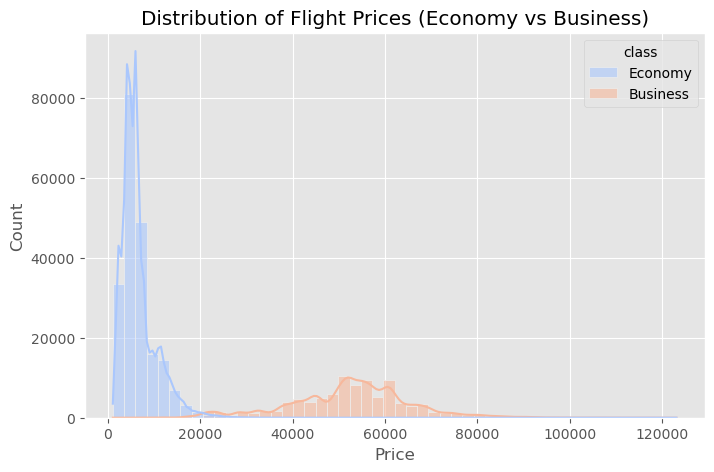

In [4]:
plt.figure(figsize=(8,5))
sns.histplot(df, x="price", hue="class", kde=True, bins=50, palette="coolwarm", alpha=0.6)
plt.xlabel("Price")
plt.ylabel("Count")
plt.title("Distribution of Flight Prices (Economy vs Business)")
plt.show()

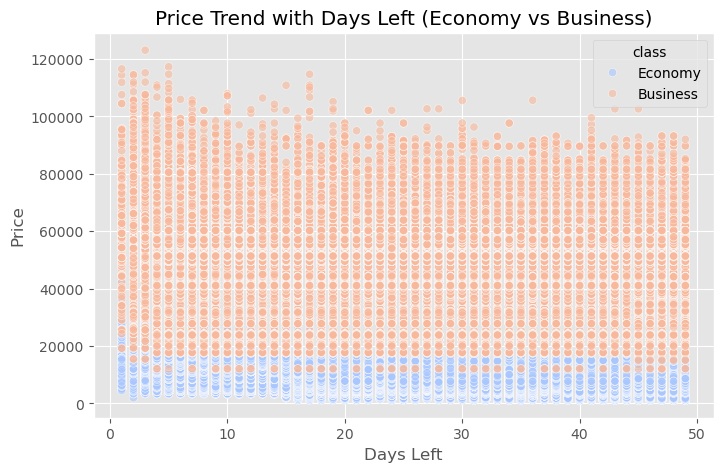

In [5]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df["days_left"], y=df["price"], hue=df["class"], alpha=0.6, palette="coolwarm")
plt.xlabel("Days Left")
plt.ylabel("Price")
plt.title("Price Trend with Days Left (Economy vs Business)")
plt.show()

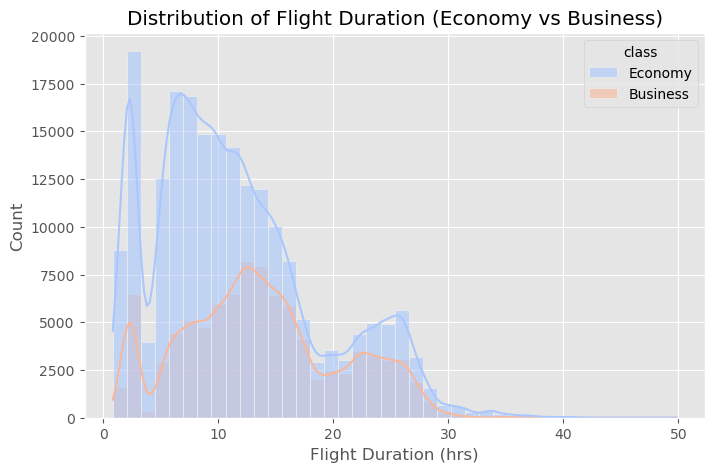

In [6]:
plt.figure(figsize=(8,5))
sns.histplot(df, x="duration", hue="class", kde=True, bins=40, palette="coolwarm", alpha=0.6)
plt.xlabel("Flight Duration (hrs)")
plt.ylabel("Count")
plt.title("Distribution of Flight Duration (Economy vs Business)")
plt.show()

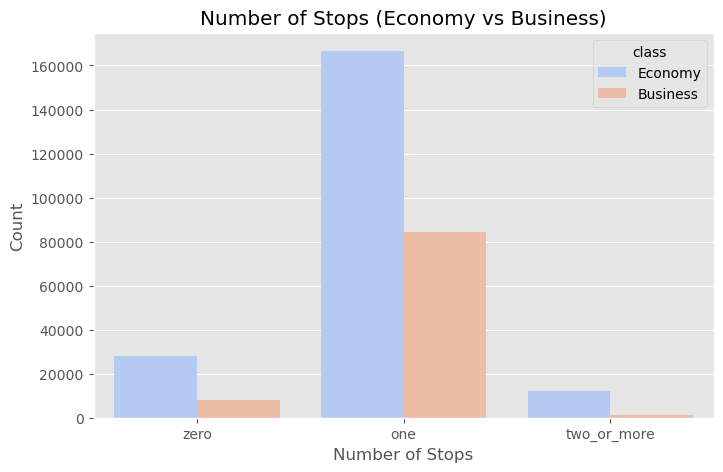

In [7]:
plt.figure(figsize=(8,5))
sns.countplot(x=df["stops"], hue=df["class"], palette="coolwarm")
plt.xlabel("Number of Stops")
plt.ylabel("Count")
plt.title("Number of Stops (Economy vs Business)")
plt.show()